# **HOUSE PRICE PREDICTION: DATA CLEANING & PREPROCESSING**

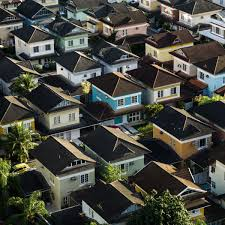

## **TABLE OF CONTENT**

### 1. INTRODUCTION
>#### 1.0 OVERVIEW
>#### 1.1 DATA DESCRIPTION

### 2. REPOSITORY
>#### 2.0 IMPORT LIBRARIES
>#### 2.1 LOAD DATASET
>#### 2.2 FILL MISSING VALUES
>#### 2.3 ENCODE CATEGORICAL VARIABLES
>#### 2.4 SPLIT DATA

### CONCLUSION

## **1. INTRODUCTION**

#### **1.0 0VERVIEW**
This project involves the process of cleaning and preprocessing the aHousing dataset to prepare it for predictive modeling. This project involves the use of two dataset, the test dataset and the train dataset.

#### **1.1 DATA DESCRIPTION**
The test dataset can be found [here](https://drive.google.com/file/d/1s5BaoplPBCsORGCchSaHpZhtt637MMie/view?usp=sharing) and the train dataset can be found [here](https://drive.google.com/file/d/1S-avYMMno7WJODKDTXcWN1TCYNfP0bDN/view?usp=sharing). The train dataset consists of 81 columns while the test dataset consist of 80 columns.

## **2. REPOSITORY**
#### **2.0 IMPORT LIBRARIES**

In [1]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import LabelEncoder

#### **2.1 LOAD DATASET**

Loading both the test & train dataset

In [2]:
# loading the train dataset
train = pd.read_csv("train.csv")

#viewing just the first three rows
train.head(3)

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500


In [3]:
# train dataset shape
train.shape

(1460, 81)

In [4]:
# test info
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 81 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1460 non-null   int64  
 1   MSSubClass     1460 non-null   int64  
 2   MSZoning       1460 non-null   object 
 3   LotFrontage    1201 non-null   float64
 4   LotArea        1460 non-null   int64  
 5   Street         1460 non-null   object 
 6   Alley          91 non-null     object 
 7   LotShape       1460 non-null   object 
 8   LandContour    1460 non-null   object 
 9   Utilities      1460 non-null   object 
 10  LotConfig      1460 non-null   object 
 11  LandSlope      1460 non-null   object 
 12  Neighborhood   1460 non-null   object 
 13  Condition1     1460 non-null   object 
 14  Condition2     1460 non-null   object 
 15  BldgType       1460 non-null   object 
 16  HouseStyle     1460 non-null   object 
 17  OverallQual    1460 non-null   int64  
 18  OverallC

In [5]:
# loading the test dataset
test = pd.read_csv("test.csv")

# viewing just the first three rows
test.head(3)

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition
0,1461,20,RH,80.0,11622,Pave,NaN,Reg,Lvl,AllPub,...,120,0,NaN,MnPrv,NaN,0,6,2010,WD,Normal
1,1462,20,RL,81.0,14267,Pave,NaN,IR1,Lvl,AllPub,...,0,0,NaN,NaN,Gar2,12500,6,2010,WD,Normal
2,1463,60,RL,74.0,13830,Pave,NaN,IR1,Lvl,AllPub,...,0,0,NaN,MnPrv,NaN,0,3,2010,WD,Normal


The train dataset consists of 81 columns but the train dataset consists of 80 columns. The test dataset doesn't have the SalesPrice column, and that column would be dropped temporarily for consistency in cleaning & encoding

In [6]:
# test dataset shape
test.shape

(1459, 80)

In [7]:
# extract the target before coming
train_target = train["SalePrice"]

In [8]:
# drop from the train dataset temporarily
train.drop("SalePrice", axis = 1, inplace = True)

# verify
train.head(3)

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,0,NaN,NaN,NaN,0,2,2008,WD,Normal
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,0,NaN,NaN,NaN,0,5,2007,WD,Normal
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,0,NaN,NaN,NaN,0,9,2008,WD,Normal


In [9]:
# combine the two dataset for uniform cleaning
# both datasets are combined by the rows (i.e adding the 1460 of the train to the 1459 of the test gives 2919)
combined = pd.concat([train, test], axis = 0, ignore_index = True)

# verifying dataset shape
combined.shape

(2919, 80)

In [10]:
# checking for missing values
missing = combined.isnull().sum()

# returning the number of missing values in each column
missing = missing[missing > 0].sort_values(ascending = False)
missing

,0
PoolQC,2909
MiscFeature,2814
Alley,2721
Fence,2348
MasVnrType,1766
FireplaceQu,1420
LotFrontage,486
GarageQual,159
GarageYrBlt,159
GarageCond,159


#### **2.2 FILL MISSING VALUES**

In [12]:
# filling missing numerical values with the median
combined["LotFrontage"] = combined["LotFrontage"].fillna(combined["LotFrontage"].median())
combined["GarageYrBlt"] = combined["GarageYrBlt"].fillna(combined["GarageYrBlt"].median())
combined["MasVnrArea"] = combined["MasVnrArea"].fillna(combined["MasVnrArea"].median())
combined["BsmtFullBath"] = combined["BsmtFullBath"].fillna(combined["BsmtFullBath"].median())
combined["BsmtHalfBath"] = combined["BsmtHalfBath"].fillna(combined["BsmtHalfBath"].median())
combined["BsmtFinSF1"] = combined["BsmtFinSF1"].fillna(combined["BsmtFinSF1"].median())
combined["TotalBsmtSF"] = combined["TotalBsmtSF"].fillna(combined["TotalBsmtSF"].median())
combined["BsmtFinSF2"] = combined["BsmtFinSF2"].fillna(combined["BsmtFinSF2"].median())
combined["GarageArea"] = combined["GarageArea"].fillna(combined["GarageArea"].median())
combined["GarageCars"] = combined["GarageCars"].fillna(combined["GarageCars"].median())

In [16]:
# filling missing numerical missing values with the mode
cat_cols = ["PoolQC", "MiscFeature", "Alley", "Fence", "MasVnrType", "FireplaceQu", "GarageQual", "GarageYrBlt",
            "GarageCond", "GarageFinish", "GarageType", "BsmtExposure", "BsmtCond", "BsmtQual", "BsmtFinType2",
            "BsmtFinType1", "MSZoning", "Functional", "Utilities", "Exterior2nd", "Exterior1st", "Electrical",
            "KitchenQual", "SaleType"]

for col in cat_cols:
    combined[col] = combined[col].fillna('None')

# Remaining categorical with mode
combined = combined.fillna(combined.mode().iloc[0])


In [18]:
# verifying
combined.isnull().sum()

,0
Id,0
MSSubClass,0
MSZoning,0
LotFrontage,0
LotArea,0
...,...
MiscVal,0
MoSold,0
YrSold,0
SaleType,0


#### **2.3 ENCODE CATEGORICAL VARIABLE**

In [19]:
# label encoding for ordinal variables
qual_dict = {'Ex':5, 'Gd':4, 'TA':3, 'Fa':2, 'Po':1, 'None':0}
for col in ['ExterQual', 'ExterCond', 'HeatingQC', 'KitchenQual', 'FireplaceQu',
            'GarageQual', 'GarageCond', 'BsmtQual', 'BsmtCond', 'PoolQC']:
    combined[col] = combined[col].map(qual_dict)

In [20]:
# one-hot encoding for nominal variables
combined = pd.get_dummies(combined)

#### **2.4 SPLIT THE DATA**

In [21]:
# Recover train and test from cleaned combined data
X_train = combined.iloc[:len(train_target), :]
X_test = combined.iloc[len(train_target):, :]

# Add target back
y_train = train_target

#### **2.5 EXPORT THE CLEANED DATA**

In [22]:
X_train.to_csv('X_train_cleaned.csv', index=False)
X_test.to_csv('X_test_cleaned.csv', index=False)
y_train.to_csv('y_train.csv', index=False)

## **CONCLUSION**
This notebook successfully demonstrates the data cleaning process for a real-world housing dataset.  
Key steps include:
* Handling missing values
* Dropping irrelevant features
* Encoding categorical variables

The final dataset is now clean, consistent, and ready for training machine learning models for house price prediction.  
The cleaned x-train data can be found [here](https://drive.google.com/file/d/1GC2rX7QFXZaoD8PKlRQRbdZaJCWKUksP/view?usp=sharing)
The cleaned x-test data can be found [here](https://drive.google.com/file/d/1WkJx1py9HOnV5A7YkfBO_RDoJm32n7__/view?usp=sharing)